#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [ ]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=a9fa542dfb512a2775ac04ff019d5bec86ec96e0c8e7e8aa5fbb9d6bae6d6f1b
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


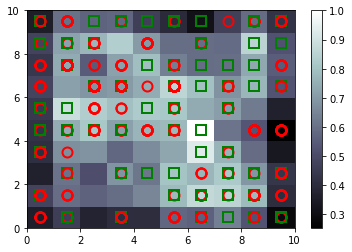

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


Concatenation may give us error, because there are some cells in the above plot that doesn't contain any customers data.

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate(((mappings[(7,5)]), (mappings[(7,6)])), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5704081e+07 1.0000000e+00 2.5170000e+01 3.5000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 6.2500000e-01 1.0000000e+00 1.0000000e+00
  7.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 7.0600000e+03]
 [1.5677112e+07 1.0000000e+00 2.7750000e+01 5.8500000e-01 1.0000000e+00
  1.3000000e+01 4.0000000e+00 2.5000000e-01 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 2.6000000e+02 5.0100000e+02]
 [1.5627699e+07 1.0000000e+00 2.2670000e+01 1.5850000e+00 1.0000000e+00
  9.0000000e+00 4.0000000e+00 3.0850000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 0.0000000e+00 2.0000000e+00 8.0000000e+01 1.0000000e+00]
 [1.5722479e+07 1.0000000e+00 2.0670000e+01 5.2900000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 3.7500000e-01 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5693382e+07 1.0000000e+00 2.2580000e+01 1.0040000e+01 2.0000000e+00
  1.4000000e+01 4.0000000e+00 4.0000000e-02 1.0000000e+00 1.

##Printing the ID's of Fraud Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15704081
15677112
15627699
15722479
15693382
15632669
15598586
15740356
15590434
15671014
15689692


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [ ]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 4s 3ms/step - loss: 0.2523 - accuracy: 0.9841
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9841
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9841
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9841
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9841
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9841
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9841
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9841
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9841
Epoch 10/10
690/690 [==============================] - 2s 2ms/step - loss: 0.0628 - accuracy: 0.9841

## Predicting test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred)

[[1.57997850e+07 3.77514766e-08]
 [1.57280100e+07 7.58788565e-06]
 [1.56548590e+07 8.38074266e-06]
 ...
 [1.57176290e+07 1.65309265e-01]
 [1.56771120e+07 1.73319399e-01]
 [1.56058720e+07 1.85447589e-01]]
